240104: Have installed things, environment is LiLab. Can see SG386, NIFPGA, and PulseStreamer. Need to now integrate them into one system to see some ODMR Now.

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import tqdm
import pulsestreamer
import nifpga
import pyvisa
import serial
import io
import time
import systemFunctions
import mdt69x

In [10]:


# confocalScan(z_vol,t_col,v_step,v_max)
# zvol=[18,19,20,21,22,23,24]

config_confocal={'v_min':0,
                 'v_max':30,
                 'v_step':1,
                 'z_vol':28,
                 't_col':5e-3,
                 'aomvolt':0.66}

config_ODMR={'aomvolt':0.66,
        'pulsenum':10000,
        'count_t':.05*1e6,
        'separation_t':.03*1e6,
        'addl_t':.003*1e6,
        'wait_t':.003*1e6,
        'freq':1.554e9,
        'mw_power':0,
        'seqplot':False}



Here We scan the Z axis confocals for finding the optimal focus Z position 
======

In [10]:
config_confocal={'v_min':0,
                 'v_max':30,
                 'v_step':.5,
                 'z_vol':16,
                 't_col':5e-3,
                 'aomvolt':0.2}

config_ODMR={'aomvolt':0.2,
        'pulsenum':10000,
        'count_t':.05*1e6,
        'separation_t':.03*1e6,
        'addl_t':.003*1e6,
        'wait_t':.003*1e6,
        'freq':1.237e9,
        'mw_power':-5,
        'seqplot':False}


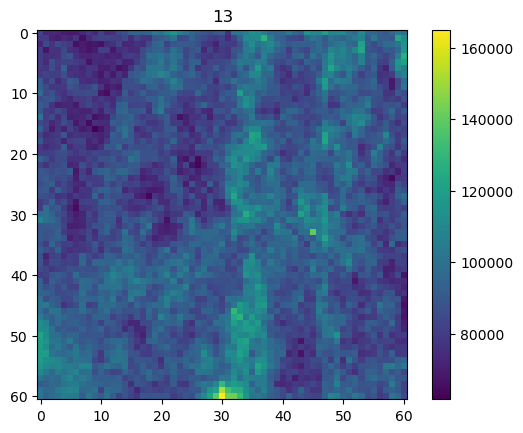

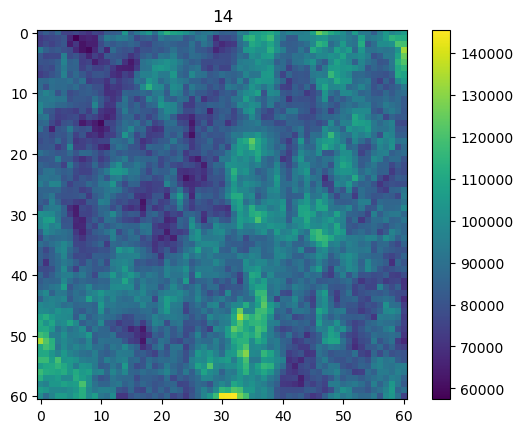

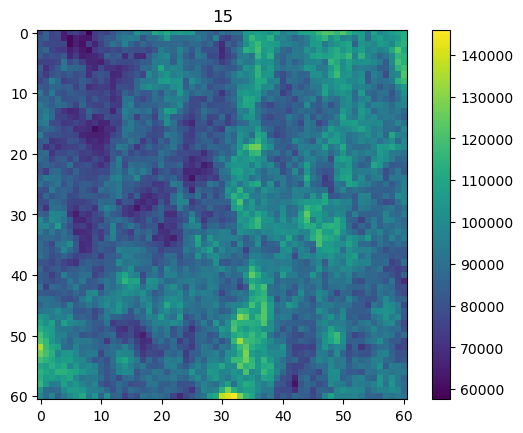

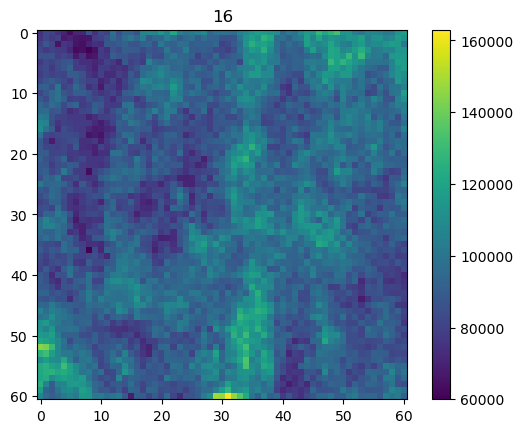

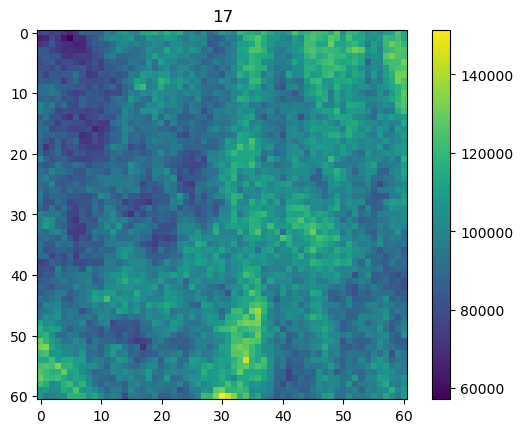

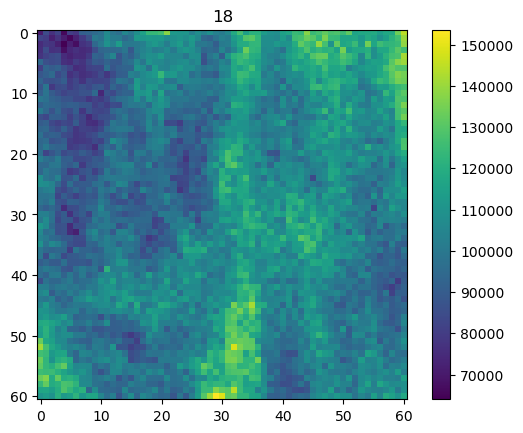

In [12]:
# config_confocal['tcol']=5e-3
zvol=[13,14,15,16,17,18]
# zvol=[28]

for zv in zvol:
    config_confocal['z_vol']=zv
    scan=systemFunctions.confocalScan(config_confocal)
    plt.imshow(scan)
    plt.title(zv)
    plt.colorbar()
    plt.show()
    # np.savetxt(str(zv)+'.csv',scan,delimiter=",")

# confocal=systemFunctions.confocalScan(28,5e-3,1,25)


Here We do a simple high-resolution confocal scan
======

In [13]:
config_confocal={'v_min':0,
                 'v_max':30,
                 'v_step':1,
                 'z_vol':15,
                 't_col':5e-3,
                 'aomvolt':0.2}
scan=systemFunctions.confocalScan(config_confocal)
plt.imshow(scan)
# plt.title(zv)
# plt.colorbar()
# plt.show()
# controller.close()
# scan=systemFunctions.confocalScan(28,tcolc,.25,50)
# plt.imshow(scan/tcolc, cmap='jet')
# plt.colorbar()
# plt.xlabel('Y Axis')
# plt.ylabel('X Axis')
# np.savetxt('240223_hBNMonoSi_DopedAnnealed_Vstep.25_tcol5e-3_30uW.csv',scan,delimiter=",")

# conf, odmr_cont, odmr_mw, odmr_nomw= systemFunctions.confocal_ODMR_Scan(config_confocal, config_ODMR)
# conf=systemFunctions.confocalScan(config_confocal)

SerialException: could not open port 'COM4': PermissionError(13, 'Access is denied.', None, 5)

In [4]:
np.savetxt('240312_hBNMonoSi_DopedAnnealed_Vstep.25_tcol5e-3_30uW.csv',scan,delimiter=",")
# conf, odmr_cont, odmr_mw, odmr_nomw
# plt.imshow(conf,cmap='jet')
# # plt.imshow(odmr,cmap='jet', vmin=np.min(odmr), vmax=np.max(odmr))
# plt.title("conf")
# plt.colorbar()

# fig, (ax1, ax2) = plt.subplots(1, 2)
# fig.suptitle('Horizontally stacked subplots')
# ax1.imshow(conf)
# ax2.imshow(odmr)

# plt.figure(2)
# f, axs = plt.subplots(2, 2, figsize=(17, 6))
# plt.subplot(2,2,1)
# plt.plot(freqs,mw_on, linewidth=2)
# plt.xlabel('Frequency (Hz)',fontsize=16)
# plt.ylabel('Counts',fontsize=16)
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
# plt.ylim([1.43e6,1.57e6])
# plt.title("MW_ON",fontsize=16)

# plt.subplot(2,2,2)
# plt.plot(freqs,mw_off, linewidth=2)
# plt.xlabel('Frequency (Hz)',fontsize=16)
# plt.ylabel('Counts',fontsize=16)
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
# plt.ylim([1.43e6,1.57e6])
# plt.title("MW_OFF",fontsize=16)

# plt.show()



Here I do the Confocal+ODMR Scan and data plotting
======

In [14]:
# Give the right config here
config_confocal={'v_min':0,
                 'v_max':40,
                 'v_step':.5,
                 'z_vol':41,
                 't_col':5e-3,
                 'aomvolt':0.5}

config_ODMR={'aomvolt':0.5,
        'pulsenum':5000,
        'count_t':.05*1e6,
        'separation_t':.02*1e6,
        'addl_t':.001*1e6,
        'wait_t':.001*1e6,
        'freq':1.353e9,
        'mw_power':-3,
        'seqplot':False}

In [15]:
# Run the confocal scan
conf, odmr_cont, odmr_mw, odmr_nomw= systemFunctions.confocal_ODMR_Scan(config_confocal, config_ODMR)

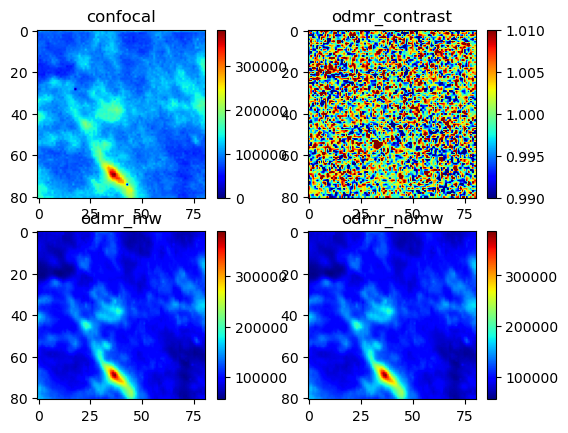

In [16]:
# plt.imshow(odmr_cont,cmap='jet')
# # plt.imshow(odmr_mw',cmap='jet', vmin=np.min(odmr_cont), vmax=np.max(odmr_cont))
# plt.title("confocal")
# plt.colorbar()

plt.subplot(2,2,1)
plt.imshow(conf,cmap='jet')
# plt.imshow(odmr_mw',cmap='jet', vmin=np.min(odmr_cont), vmax=np.max(odmr_cont))
plt.title("confocal")
plt.colorbar()

plt.subplot(2,2,2)
# plt.imshow(odmr_cont,cmap='jet')
# plt.imshow(odmr_mw',cmap='jet', vmin=np.min(odmr_cont), vmax=np.max(odmr_cont))
plt.imshow(odmr_cont,cmap='jet', vmin=.99, vmax=1.01)
plt.title("odmr_contrast")
plt.colorbar()

plt.subplot(2,2,3)
plt.imshow(odmr_mw,cmap='jet')
# plt.imshow(odmr_mw',cmap='jet', vmin=np.min(odmr_cont), vmax=np.max(odmr_cont))
plt.title("odmr_mw")
plt.colorbar()

plt.subplot(2,2,4)
plt.imshow(odmr_nomw,cmap='jet')
# plt.imshow(odmr_mw',cmap='jet', vmin=np.min(odmr_cont), vmax=np.max(odmr_cont))
plt.title("odmr_nomw")
plt.colorbar()

In [17]:
np.savetxt('240505_hBNFewSi_DopedNotAnnealed_01_Vstep1_tcol5e-3_30uW_2dBm_odmrcont.csv',odmr_cont,delimiter=",")
np.savetxt('240505_hBNFewSi_DopedNotAnnealed_01_Vstep1_tcol5e-3_30uW_2dBm_odmr_mw.csv',odmr_mw,delimiter=",")
np.savetxt('240505_hBNFewSi_DopedNotAnnealed_01_Vstep1_tcol5e-3_30uW_2dBm_odmr_nomw.csv',odmr_nomw,delimiter=",")
np.savetxt('240505_hBNFewSi_DopedNotAnnealed_01_Vstep1_tcol5e-3_30uW_2dBm_conf.csv',conf,delimiter=",")